In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score, f1_score, auc, make_scorer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/NLP 220/arxiv_data.json')
dataset.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV]
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]"


In [3]:
dataset.shape

(51774, 3)

In [4]:
print(dataset.dtypes)

titles       object
summaries    object
terms        object
dtype: object


In [5]:
def preprocess_text(text):
    nltk.download('wordnet', quiet=True)
    nltk.download('stopwords', quiet=True)

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Tokenize, remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split()
             if word not in stop_words and len(word) > 2]

    return ' '.join(words)

dataset['improved_summaries'] = dataset['summaries'].apply(preprocess_text)

In [6]:
# Feature 1 - Length of summaries
dataset['improved_summaries'] = dataset['improved_summaries'].fillna('')
dataset['Description_Length'] = dataset['improved_summaries'].apply(lambda x: len(x.split()))
dataset.head()

,titles,summaries,terms,improved_summaries,Description_Length
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",stereo matching one widely used technique infe...,79
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",recent advancement artificial intelligence com...,127
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",paper proposed novel mutual consistency networ...,152
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],consistency training proven advanced semisuper...,124
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",ensure safety automated driving correct percep...,164


In [7]:
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

vectorizer = CountVectorizer(max_features=10, stop_words=stop_words)
X = vectorizer.fit_transform(dataset['improved_summaries'])
keywords = vectorizer.get_feature_names_out()
dataset['Keywords'] = dataset['improved_summaries'].apply(
    lambda x: [word for word in keywords if word in x.lower()])

dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,titles,summaries,terms,improved_summaries,Description_Length,Keywords
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",stereo matching one widely used technique infe...,79,"[image, network, propose]"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",recent advancement artificial intelligence com...,127,"[approach, data, image]"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",paper proposed novel mutual consistency networ...,152,"[approach, data, feature, image, method, model..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],consistency training proven advanced semisuper...,124,"[data, feature, image, method, model, network,..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",ensure safety automated driving correct percep...,164,"[approach, data, image, learning, method, mode..."


In [8]:
# Feature 2 - Bag of Words
vectorizer = CountVectorizer(max_features=2000, ngram_range=(1, 2), min_df=3, max_df=0.95)
word_freq_matrix = vectorizer.fit_transform(dataset['improved_summaries'])
word_freq_df = pd.DataFrame(word_freq_matrix.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df.head()

,ability,ablation,ablation study,able,abstract,access,according,account,accuracy,accurate,...,work,work present,work propose,working,world,would,year,yet,yield,zeroshot
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0


In [9]:
# Feature 3 - TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=3, max_df=0.95, use_idf=True, smooth_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['improved_summaries'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,ability,able,according,account,accuracy,accurate,accurately,achieve,achieved,achieves,...,within,without,word,work,work propose,world,would,year,yet,yield
0,0.000000,0.0,0.0,0.0,0.073419,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.081564,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.160085,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.107399,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.087152,0.0,0.0,0.000000,0.074718,0.0,0.0


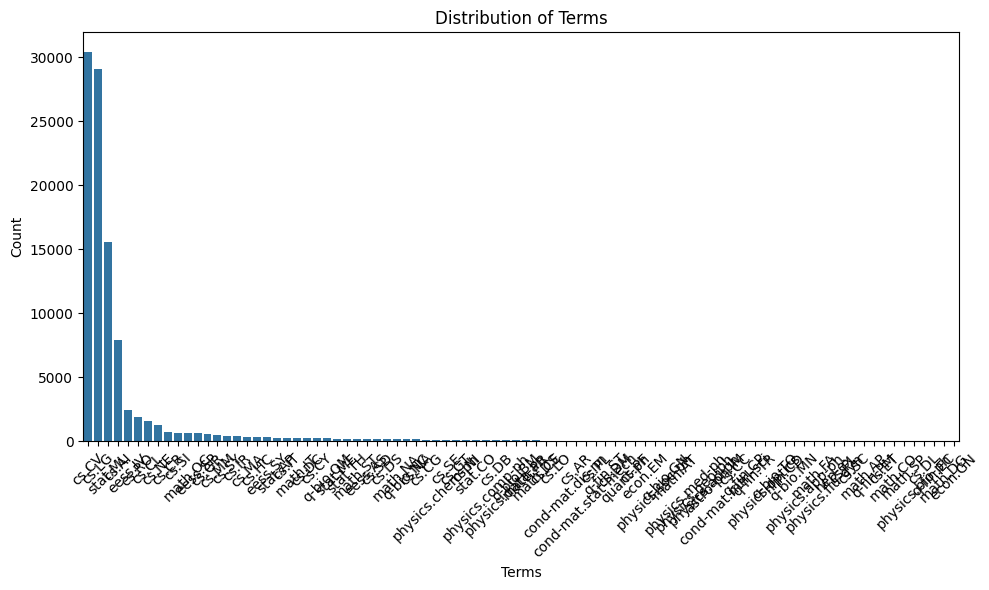

In [10]:
# Split terms and get all unique values
all_terms = []
for term_list in dataset['terms']:
    all_terms.extend(term_list)  # Directly extend with the list of terms

# Count frequency of each term
term_counts = pd.Series(all_terms).value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=term_counts.index, y=term_counts.values)
plt.title('Distribution of Terms')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(term_counts)

cs.CV             30413
cs.LG             29067
stat.ML           15578
cs.AI              7944
eess.IV            2484
                  ...  
physics.bio-ph       13
cs.DL                12
q-fin.EC             12
math.DG              11
econ.GN              11
Name: count, Length: 88, dtype: int64


In [12]:
# Feature Engineering 1
X_f1 = pd.concat([dataset[['Description_Length']], word_freq_df, tfidf_df], axis=1)
y = dataset['terms']

X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X_f1, y, test_size=0.30, random_state=1234)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.50, random_state=1234)

In [14]:
# MLP - 1
classifierMLP1 = MultiLabelBinarizer()

# Transform the target variables for training and testing
y_train_bin = classifierMLP1.fit_transform(y_train1)
y_val_bin = classifierMLP1.transform(y_val1)

mlp_classifier = MLPClassifier()  # Initialize your MLP classifier
mlp_classifier.fit(X_train1, y_train_bin)  # Fit with features and binarized labels
y_pred_bin = mlp_classifier.predict(X_val1)  # Predict on val data
# y_pred1 = classifierMLP1.inverse_transform(y_pred_bin) #Inverse transform to original labels

# Evaluate the model using binarized labels
accuracy = accuracy_score(y_val_bin, y_pred_bin) # Use binarized labels for evaluation
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val_bin, y_pred_bin)) # Use binarized labels for evaluation
# print(confusion_matrix(y_val_bin, y_pred_bin)) # Use binarized labels for evaluation

Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.44      0.29      0.35        14
           2       0.50      0.25      0.33         4
           3       0.27      0.38      0.32         8
           4       0.56      0.54      0.55      1235
           5       0.17      0.25      0.20         4
           6       0.50      0.09      0.15        11
           7       0.20      0.17      0.18         6
           8       0.47      0.35      0.40        20
           9       0.59      0.62      0.61       239
          10       0.44      0.50      0.47       104
          11       0.93      0.93      0.93      4585
          12       0.51      0.42      0.46        45
          13       0.42      0.28      0.33        18
          14       0.55      0.35      0.43        46
          15       0.50      0.25      0.33         4
          16       0.38      0.71      0.50         7
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [15]:
# SVM - 1
# Initialize the MultiLabelBinarizer and fit it to your training data
classifierSVM1 = MultiLabelBinarizer()
y_train_bin = classifierSVM1.fit_transform(y_train1) # Transform y_train1 into binary format
y_val_bin = classifierSVM1.transform(y_val1) # Transform y_val1 using the same binarizer

# Wrap LinearSVC with OneVsRestClassifier for multi-label classification
classifierSVM1 = OneVsRestClassifier(LinearSVC(random_state=42)) # Wrap with OneVsRestClassifier
classifierSVM1.fit(X_train1, y_train_bin) # Fit using the binarized labels
y_pred_bin = classifierSVM1.predict(X_val1) # Predict on val data

# Inverse transform the predicted binary labels to get original labels
# y_pred1 = classifierSVM1.inverse_transform(y_pred_bin)

# Evaluate the model using the original labels
accuracy = accuracy_score(y_val_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val_bin, y_pred_bin))
# print(confusion_matrix(y_val_bin, y_pred_bin))

Accuracy: 0.41
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.29      0.40        14
           2       1.00      0.25      0.40         4
           3       0.75      0.38      0.50         8
           4       0.54      0.21      0.30      1235
           5       0.33      0.25      0.29         4
           6       1.00      0.09      0.17        11
           7       0.50      0.33      0.40         6
           8       0.64      0.35      0.45        20
           9       0.50      0.58      0.54       239
          10       0.41      0.52      0.46       104
          11       0.94      0.92      0.93      4585
          12       0.49      0.42      0.45        45
          13       0.75      0.33      0.46        18
          14       0.50      0.46      0.48        46
          15       1.00      0.25      0.40         4
          16       1.00      0.71      0.83         7
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [16]:
# Decision Tree - 1
clf = MultiLabelBinarizer()
y_train_bin = clf.fit_transform(y_train1)
y_val_bin = clf.transform(y_val1)

classifierDT1 = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=42))
classifierDT1.fit(X_train1, y_train_bin)
y_pred_bin = classifierDT1.predict(X_val1)

# Evaluate the model
accuracy = accuracy_score(y_val_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val_bin, y_pred_bin))
# print(confusion_matrix(y_val_bin, y_pred_bin))

Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.50      0.29      0.36        14
           2       1.00      0.25      0.40         4
           3       0.20      0.25      0.22         8
           4       0.54      0.52      0.53      1235
           5       0.33      0.25      0.29         4
           6       1.00      0.09      0.17        11
           7       0.20      0.17      0.18         6
           8       0.50      0.40      0.44        20
           9       0.62      0.61      0.62       239
          10       0.46      0.48      0.47       104
          11       0.92      0.91      0.92      4585
          12       0.40      0.38      0.39        45
          13       0.26      0.28      0.27        18
          14       0.45      0.33      0.38        46
          15       1.00      0.25      0.40         4
          16       0.50      0.71      0.59         7
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
"""from sklearn.preprocessing import StandardScaler

# Logistic Regression - 1
clf = MultiLabelBinarizer()
y_train_bin = clf.fit_transform(y_train1)
y_test_bin = clf.transform(y_test1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

classifierLR1 = OneVsRestClassifier(LogisticRegression(random_state = 42, max_iter=1000))
classifierLR1.fit(X_train_scaled, y_train_bin)
y_pred_bin = classifierLR1.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_bin, y_pred_bin))
# print(confusion_matrix(y_test1, y_pred1))

In [17]:
# NB - 1
clf = MultiLabelBinarizer()
y_train_bin = clf.fit_transform(y_train1)
y_val_bin = clf.transform(y_val1)

classifierNB1 = OneVsRestClassifier(GaussianNB())
classifierNB1.fit(X_train1, y_train_bin)
y_pred_bin = classifierNB1.predict(X_val1)

# Evaluate the model
accuracy = accuracy_score(y_val_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val_bin, y_pred_bin))

Accuracy: 0.05
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      0.21      0.33        14
           2       0.50      0.25      0.33         4
           3       0.50      0.25      0.33         8
           4       0.27      0.71      0.39      1235
           5       0.50      0.25      0.33         4
           6       0.50      0.09      0.15        11
           7       0.33      0.17      0.22         6
           8       0.41      0.35      0.38        20
           9       0.11      0.85      0.20       239
          10       0.06      0.77      0.10       104
          11       0.95      0.88      0.92      4585
          12       0.10      0.44      0.16        45
          13       0.45      0.28      0.34        18
          14       0.10      0.35      0.16        46
          15       1.00      0.25      0.40         4
          16       0.71      0.71      0.71         7
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [18]:
# Random Forest - 1
clf = MultiLabelBinarizer()
y_train_bin = clf.fit_transform(y_train1)
y_val_bin = clf.transform(y_val1)

classifierRF1 = OneVsRestClassifier(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42))
classifierRF1.fit(X_train1, y_train_bin)
y_pred_bin = classifierRF1.predict(X_val1)

# Evaluate the model
accuracy = accuracy_score(y_val_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val_bin, y_pred_bin))

Accuracy: 0.57
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.21      0.35        14
           2       1.00      0.25      0.40         4
           3       1.00      0.25      0.40         8
           4       0.83      0.39      0.53      1235
           5       1.00      0.25      0.40         4
           6       1.00      0.09      0.17        11
           7       1.00      0.17      0.29         6
           8       1.00      0.25      0.40        20
           9       0.96      0.44      0.60       239
          10       0.93      0.26      0.41       104
          11       0.95      0.93      0.94      4585
          12       1.00      0.22      0.36        45
          13       1.00      0.22      0.36        18
          14       1.00      0.15      0.26        46
          15       1.00      0.25      0.40         4
          16       1.00      0.57      0.73         7
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [19]:
# Best Model on Test Set
clf = MultiLabelBinarizer()
y_train_bin = clf.fit_transform(y_train1)
y_test_bin = clf.transform(y_test1)
y_val_bin = clf.transform(y_val1)

classifierRF1 = OneVsRestClassifier(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42))
classifierRF1.fit(X_train1, y_train_bin)

"""# Evaluate the model
y_pred_bin = classifierRF1.predict(X_train1)
accuracy = accuracy_score(y_train_bin, y_pred_bin)
print("\nTraining Set Performance:")
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_train_bin, y_pred_bin))

# Make predictions on validation set
y_pred_val = classifierRF1.predict(X_val1)
print("\nValidation Set Performance:")
print("Accuracy:", accuracy_score(y_val_bin, y_pred_val))
print("\nClassification Report:")
print(classification_report(y_val_bin, y_pred_val))

"""

# Make predictions on test set
y_pred_test = classifierRF1.predict(X_test1)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_test))


Test Set Performance:
Accuracy: 0.5668855413930732

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.11      0.20         9
           2       1.00      0.40      0.57         5
           3       1.00      0.11      0.20         9
           4       0.86      0.38      0.53      1230
           5       1.00      0.22      0.36         9
           6       0.00      0.00      0.00        10
           7       1.00      0.31      0.47        13
           8       1.00      0.46      0.63        24
           9       0.93      0.41      0.57       232
          10       1.00      0.18      0.30       117
          11       0.95      0.92      0.94      4530
          12       1.00      0.13      0.24        45
          13       1.00      0.09      0.17        11
          14       0.88      0.16      0.27        43
          15       0.00      0.00      0.00         0
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
"""# Hyper parameter tuning

mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train1)
y_val_bin = mlb.transform(y_val1)
y_test_bin = mlb.transform(y_test1)

param_distributions = {
    'estimator__n_estimators': [100, 200, 300, 400, 500],
    'estimator__max_depth': [10, 20, 30, 40, 50, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt'],
    'estimator__bootstrap': [True, False]
}

rf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42))

def multi_label_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

f1_scorer = make_scorer(multi_label_f1)

# Initialize RandomizedSearchCV with minimal iterations
random_searchRF = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=5,
    cv=2,
    scoring=f1_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
random_searchRF.fit(X_train1, y_train_bin)

# Print the best parameters and score
print("Best parameters:", random_searchRF.best_params_)
print("Best cross-validation score:", random_searchRF.best_score_)

# Make predictions on validation set
y_pred_val = random_searchRF.predict(X_val1)
print("\nValidation Set Performance:")
print("Accuracy:", accuracy_score(y_val_bin, y_pred_val))
print("\nClassification Report:")
print(classification_report(y_val_bin, y_pred_val))

# Save the best model
best_model = random_searchRF.best_estimator_

# Make predictions on test set
y_pred_test = best_model.predict(X_test1)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_test))